In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('amazon.csv')
df.shape

(1465, 16)

In [3]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [4]:
# Check if each row present a product
df['product_id'].value_counts()

product_id
B07JW9H4J1    3
B085DTN6R2    3
B07XLCFSSN    3
B077Z65HSD    3
B09W5XR9RT    3
             ..
B0BNVBJW2S    1
B09VZBGL1N    1
B01F262EUU    1
B0BBFJLP21    1
B01486F4G6    1
Name: count, Length: 1351, dtype: int64

In [5]:
# Check missing value
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
# Check type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Data Cleaning

In [9]:
# Remove the dollar sign
df['actual_price']= df['actual_price'].replace( {'\₹': '' , ',': ''}, regex=True).astype(float)

df['discounted_price']= df['discounted_price'].replace( {'\₹': '' , ',': ''}, regex=True).astype(float)

# Remove symbol
df['discount_percentage'] = df['discount_percentage'].replace({'%': ''}, regex=True).astype(float) / 100


In [10]:
# Explore rating
df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

There is a symbol '|' in this dataset. We can try to fill up with the mean of that product

In [13]:
bad_rating = df[df['rating']=='|']
bad_rating_id = bad_rating['product_id']
bad_rating_id

1279    B08L12N5H1
Name: product_id, dtype: object

In [15]:
df[df['product_id']=='B08L12N5H1']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


There is no other rating on this product. So I will get the average of the same category to fill in this missing value.

In [30]:
missing_rating = df[df['product_id']=='B08L12N5H1']
missing_rating_cat = missing_rating['category']
missing_rating_cat = missing_rating_cat.values[0]
missing_rating_cat

'Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|HandheldVacuums'

In [33]:
# Find the average of Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle..
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

rating_avg_HomeKitchen = df[df['category'] == missing_rating_cat]
rating_avg_HomeKitchen_mean = round(rating_avg_HomeKitchen['rating'].mean(), 1) # one decimal place
rating_avg_HomeKitchen_mean

3.9

In [34]:
# Fill the nan in rating
df['rating'] = df['rating'].fillna(rating_avg_HomeKitchen_mean)

In [36]:
### Check what data is missing
missing_data = df[df['rating_count'].isnull()]
missing_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [37]:
df[(df['product_id'] == 'B0B94JPY2N') | (df['product_id'] == 'B0BQRJ3C47')]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


Missing value product: product_id = B0B94JPY2N and B0B94JPY2N

In [38]:
df[(df['product_id'] == 'B0B94JPY2N') | (df['product_id'] == 'B0BQRJ3C47')]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


These product is unique, so we can't use ffill or mean to fill the missing value.

In [40]:
# Fill in the missing value by 1 because each row include at least one rating
df['rating_count'] = df['rating_count'].fillna(1)

df['rating_count'] = df['rating_count'].replace( { ',': ''}, regex=True).astype('float64') # remove commas


In [44]:
# Explore the summary
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18270.565870
std,6944.304394,10874.826864,0.216359,0.291620,42729.994731
min,39.000000,39.000000,0.000000,2.000000,1.000000
25%,325.000000,800.000000,0.320000,4.000000,1173.000000
50%,799.000000,1650.000000,0.500000,4.100000,5178.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [47]:
# Explore duplicates ID
duplicates = df[df['product_id'].duplicated(keep=False)]

# Sort the duplicates by 'product_id'
duplicates_sorted = duplicates.sort_values(by='product_id')
duplicates_sorted


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
46,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
881,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,0.58,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
33,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,599.0,599.0,0.00,4.3,355.0,USB Type-C to Type-C cable with universal comp...,"AEQWVGESA7TDGK7KZ4DAJQGYH32A,AECGAMNNIMW5QOPOB...","Verified Buyer,Avishek Majumdar,Drowna roy,mah...","R2Z9ENI1BK4EAB,R2JTBG4GO7WPMG,R3GKCN4UH999M8,R...","Good,Genuine product,Not first charge this cab...","Buy it,Received in good condition and is worki...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Samsung-Original-Type-Ca...
833,B008FWZGSG,Samsung Original Type C to C Cable - 3.28 Feet...,Computers&Accessories|Accessories&Peripherals|...,599.0,599.0,0.00,4.3,355.0,USB Type-C to Type-C cable with universal comp...,"AEQWVGESA7TDGK7KZ4DAJQGYH32A,AECGAMNNIMW5QOPOB...","Verified Buyer,Avishek Majumdar,Drowna roy,mah...","R2Z9ENI1BK4EAB,R2JTBG4GO7WPMG,R3GKCN4UH999M8,R...","Good,Genuine product,Not first charge this cab...","Buy it,Received in good condition and is worki...",https://m.media-amazon.com/images/I/11ICusapw3...,https://www.amazon.in/Samsung-Original-Type-Ca...
40,B00NH11KIK,AmazonBasics USB 2.0 Cable - A-Male to B-Male ...,Computers&Accessories|Accessories&Peripherals|...,209.0,695.0,0.70,4.5,107687.0,One 6-foot-long (1.8 meters) high-speed multi-...,"AEYHTCWWZYU3JQBU6SLNFFT3OMVQ,AENQPV63OVBZHJ7L7...","Shiva,Uzef,kottala samuel,Renjith,Dhivakaran,M...","R2AE3BN2Y58N55,R6YVRITBSRECR,R232KD83Q3MVML,R2...","Functionality as described,Working,Great USB i...","Using it and satisfactory.,Working good also n...",https://m.media-amazon.com/images/I/4101vlzySz...,https://www.amazon.in/AmazonBasics-USB-2-0-Cab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,B0BDRVFDKP,"SanDisk Ultra® microSDXC™ UHS-I Card, 64GB, 14...",Electronics|Accessories|MemoryCards|MicroSD,569.0,1000.0,0.43,4.4,67262.0,Ideal storage for Android smartphones and tabl...,"AG44HJB2AMIVHAGQZ2WGWONERKCA,AHL2FABQV6XAHZN54...","Prashant,Sumesh Sundararajan,Vijay Baitha,S.k ...","R2A7MIUNOW8DOE,R2FXP703540FR1,R37E7QJET0BYE8,R...","Fake Product,Costly but excellent quality,Stor...",128GB SD Card is showing 134GBDon't buy this p...,https://m.media-amazon.com/images/I/41ML8ZbPii...,https://www.amazon.in/SanDisk-Ultra%C2%AE-micr...
908,B0BFWGBX61,Ambrane Unbreakable 3A Fast Charging Braided T...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.1,314.0,"Compatible with all Type C enabled devices, be...","AF36YUJUEUU3SA42PFAULM2F5RYA,AESE26BMILSD6E4AV...","Vipan Agnihotri,Hitender singh,Anuj Chauhan,Mu...","RQAF3Q7KCEGHP,R3CBLDFSRTKKYA,R3PZ3ENFIS7IJG,R2...","Good product,Strong and powerful,Useful produc...","quality is ok ok only,We

In [50]:
# Get the latest record
idx = df.groupby('product_id')['rating_count'].idxmax()

# Use the index to filter the DataFrame
cleaned_df = df.loc[idx].reset_index(drop=True)
cleaned_df.shape

(1351, 16)

In [55]:
cleaned_df['product_id'].value_counts().sum()

1351

____

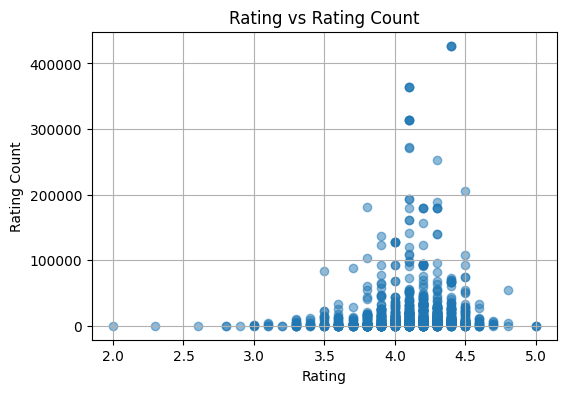

In [60]:
# Rating vs Rating Counts
plt.figure(figsize=(6, 4))
plt.scatter(cleaned_df['rating'], cleaned_df['rating_count'], alpha=0.5)
plt.title('Rating vs Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.grid(True)
plt.show()

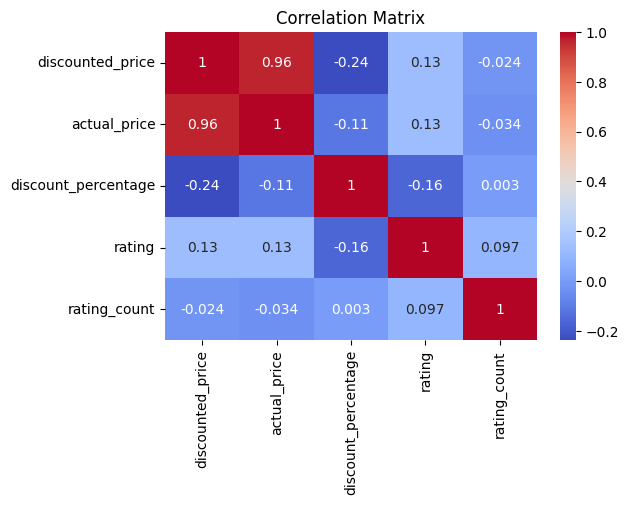

In [67]:
# Correlation matrix plot
correlation_matrix = cleaned_df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Overall, the matrix highlights that while pricing factors are closely linked, customer ratings and the popularity of a product (as measured by rating counts) do not show strong dependencies on pricing or discounts. This might suggest that other factors, such as product quality or brand reputation, could play more significant roles in influencing consumer ratings and the number of reviews a product receives.

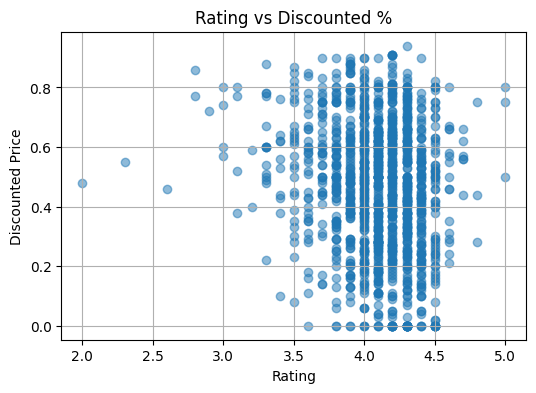

In [70]:
# Rating vs. discount_percentage
plt.figure(figsize=(6, 4))
plt.scatter(cleaned_df['rating'], cleaned_df['discount_percentage'], alpha=0.5)
plt.title('Rating vs Discounted %')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()

There is no clear trend indicating that higher discounts lead to higher ratings or vice versa. Products with very high ratings (close to 5.0) and very low ratings (around 2.0) display a similar range of discount percentages. This indicates that while discounts are commonly used across all types of products, the amount of discount offered does not necessarily influence how highly a product is rated by consumers.

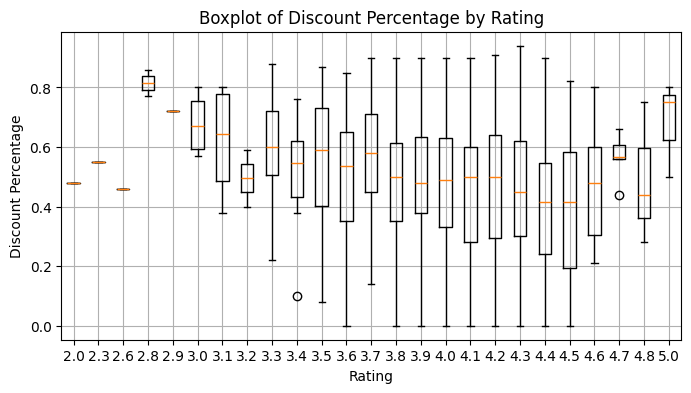

In [96]:
plt.figure(figsize=(8, 4))

# Grouping by rating and creating a boxplot for discount_percentage for each unique rating
plt.boxplot([cleaned_df.loc[cleaned_df['rating'] == rating, 'discount_percentage'].dropna() 
             for rating in sorted(cleaned_df['rating'].unique())])

# Setting x-axis labels as the sorted unique ratings
plt.xticks(ticks=range(1, len(sorted(cleaned_df['rating'].unique())) + 1), 
           labels=sorted(cleaned_df['rating'].unique()))

plt.title('Boxplot of Discount Percentage by Rating')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')

plt.grid(True)
plt.show()

##### Flexible Discounting: 

The wide spread of discount percentages suggests that discounts are applied flexibly across products, regardless of how customers rate them. This could be an opportunity to optimize discount strategies, potentially offering larger discounts for lower-rated products to boost sales or using smaller discounts for higher-rated, in-demand items.


##### Discount Consistency: 

The relatively stable median discount across all ratings suggests that the current discount strategy is applied uniformly, without much differentiation based on customer satisfaction or product performance. If the goal is to clear inventory or drive sales for specific products, more dynamic discounting strategies could be explored.


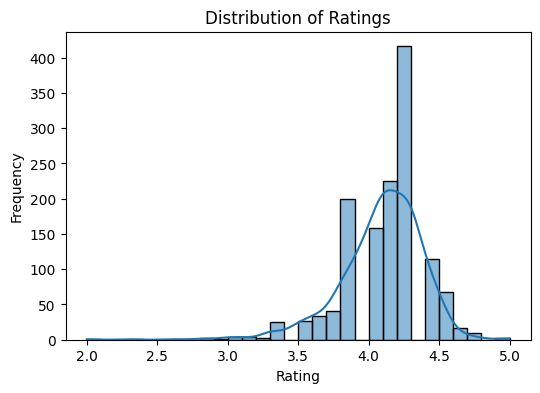

In [72]:
# Ratings Distribution
plt.figure(figsize=(6, 4))
sns.histplot(cleaned_df['rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histogram "Distribution of Ratings" shows the frequency distribution of product ratings within the dataset. This visualization reveals a strong skew towards higher ratings, with the majority of products receiving ratings between 4.0 and 5.0. Notably, there is a significant peak around the 4.5 rating mark, indicating that a substantial number of products are rated favorably by customers.

In [79]:
categories_above_44 = cleaned_df.groupby('category').filter(lambda x: x['rating'].mean() > 4.4)
unique_categories_above_44 = categories_above_44['category'].unique()
unique_categories_above_44

array(['Electronics|PowerAccessories|SurgeProtectors',
       'OfficeProducts|OfficeElectronics|Calculators|Scientific',
       'Electronics|GeneralPurposeBatteries&BatteryChargers|DisposableBatteries',
       'Home&Kitchen|CraftMaterials|PaintingMaterials|Paints',
       'Home&Kitchen|CraftMaterials|PaintingMaterials',
       'Electronics|Cameras&Photography|Accessories|Film',
       'Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories',
       'OfficeProducts|OfficeElectronics|Calculators|Basic',
       'HomeImprovement|Electrical|CordManagement',
       'Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses',
       'Computers&Accessories|Components|Memory',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters',
       'Electronics|Mobiles&Accessories|MobileAccessories|Maintenance,Upkeep&Repairs|ScreenProtectors',
       'Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFrye

#### Categories indicating high customer satisfaction (Above 4.4 rating)
1. Computers & Accessories 
2. Electronics 
3. Home & Kitchen 
4. Office Products 

These categories cover a wide range of products from technical devices like routers and USB adapters to household items like toasters and vacuum cleaners. High ratings in diverse categories like these suggest that products are well-received across different domains, possibly reflecting good quality, value for money, or customer service associated with these products.

In [89]:
# create new columns: Level 1 to Level 3 Categories
cleaned_df['first_category'] = cleaned_df['category'].astype(str).str.split('|').str[0]
cleaned_df['second_category'] = cleaned_df['category'].astype(str).str.split('|').str[-1]
cleaned_df['third_category'] = cleaned_df['category'].astype(str).str.split('|').str[-2]

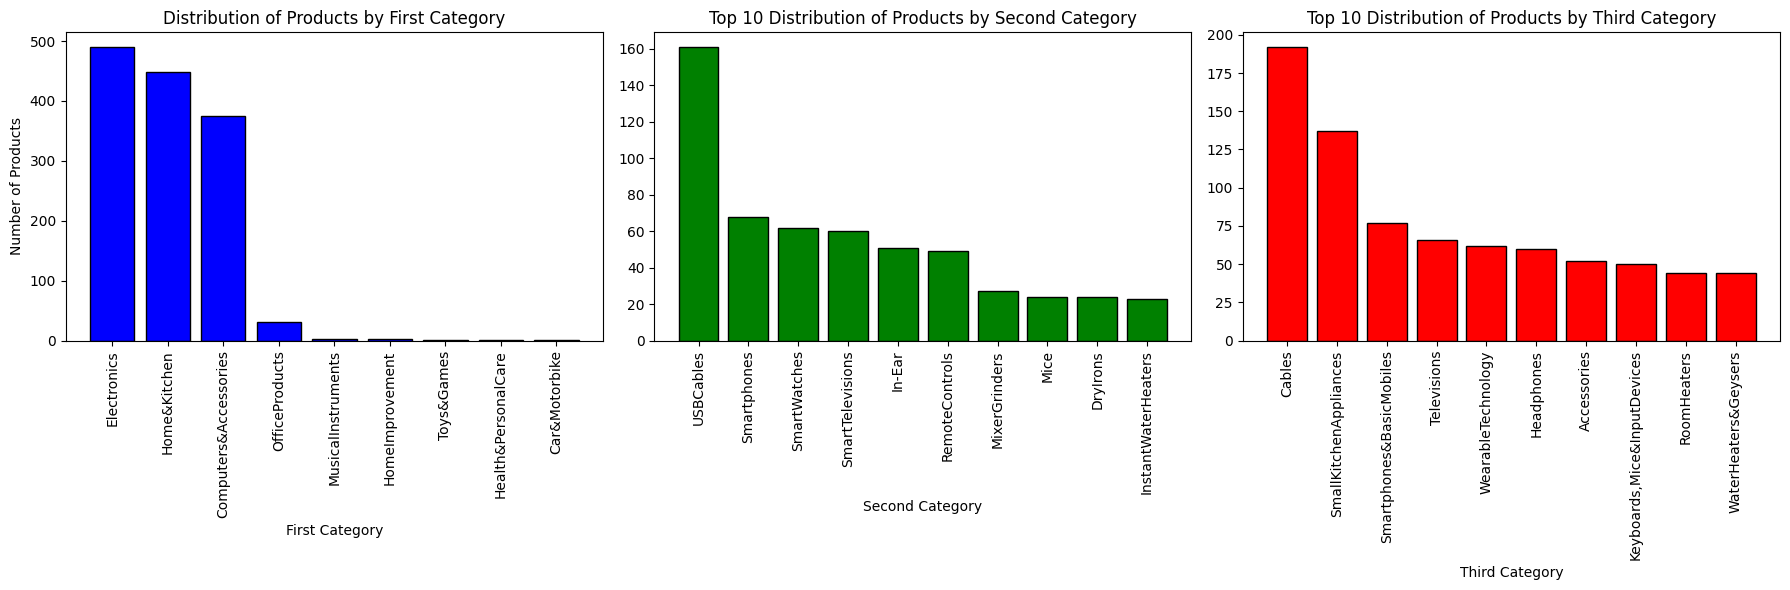

In [94]:
# Count the number of products in each category
first_category_counts = cleaned_df['first_category'].value_counts().sort_values(ascending=False)
second_category_counts = cleaned_df['second_category'].value_counts().sort_values(ascending=False)
third_category_counts = cleaned_df['third_category'].value_counts().sort_values(ascending=False)

# Limit second and third category counts to the top 10
top_10_second_category = second_category_counts.head(10)
top_10_third_category = third_category_counts.head(10)

# Creating subplots for the first, second, and third categories
fig, ax = plt.subplots(1, 3, figsize=(18, 6)) 

# Bar chart for first category
ax[0].bar(first_category_counts.index, first_category_counts.values, color='blue', edgecolor='black')
ax[0].set_title('Distribution of Products by First Category')
ax[0].set_xlabel('First Category')
ax[0].set_ylabel('Number of Products')
ax[0].tick_params(axis='x', rotation=90)

# Bar chart for top 10 second category
ax[1].bar(top_10_second_category.index, top_10_second_category.values, color='green', edgecolor='black')
ax[1].set_title('Top 10 Distribution of Products by Second Category')
ax[1].set_xlabel('Second Category')
ax[1].tick_params(axis='x', rotation=90)

# Bar chart for top 10 third category
ax[2].bar(top_10_third_category.index, top_10_third_category.values, color='red', edgecolor='black')
ax[2].set_title('Top 10 Distribution of Products by Third Category')
ax[2].set_xlabel('Third Category')
ax[2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The first chart highlights that the majority of products belong to the Electronics and Home & Kitchen categories, indicating that these segments dominate the dataset. In the second chart, the prominence of USB Cables and Smartphones within the top 10 subcategories highlights the significant role that electronic accessories play, particularly for mobile devices. Smart home and wearable devices also feature prominently, reflecting a growing trend towards smart technology. The third chart reinforces the importance of accessories, with Cables and Small Kitchen Appliances leading the way. This suggests that customers often purchase complementary products for their electronics and home appliances. Strategically, marketing efforts should focus on the dominant categories of electronics and home appliances, while also considering the potential for growth in underrepresented categories. Additionally, offering product bundles or cross-sell opportunities for accessories could enhance customer engagement and sales.

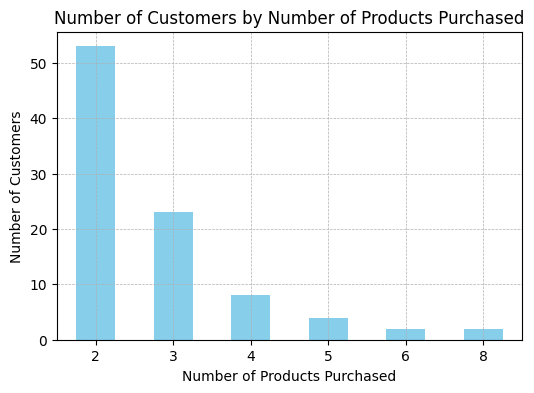

In [86]:
# Find the number of products purchased by each user_id
user_purchase_counts = cleaned_df['user_id'].value_counts()

users_with_multiple_purchases = user_purchase_counts[user_purchase_counts > 1]

product_purchase_distribution = users_with_multiple_purchases.value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
product_purchase_distribution.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Number of Products Purchased')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


This visualization is useful for analyzing customer purchase behaviors, highlighting that while a significant number of users return to make a second purchase, only a few continue to buy more extensively. This could be relevant for developing loyalty programs or targeted marketing strategies to encourage more frequent purchases among existing customers.